In [25]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA

In [26]:
class Context:
    '''
    Clase que permite almacenar el contexto de ejecución de los pasos 
    del pipeline. Esta clase será particularmente útil en el último 
    paso del pipeline donde necesitaremoslos datos generados por todos 
    los pasos del pipeline para imprimir el detalle de los resultados.
    '''
    def __init__(self) -> None :
        self.centroids = None
        self.labels = None

    def transform(self, X, y=None):
        return self

In [27]:
class ImageLoader(BaseEstimator, TransformerMixin) :
    '''
    Este paso del pipeline se encarga de cargar la imagen a partir de un 
    archivo. En este paso se recibe un archivo y se retorna una matriz 
    de pixeles en formato RGB. 
    '''
    def __init__(self, context) -> None:
        self.context = context

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        '''
        Recibe un archivo en el parámetro X y retorna una matriz de 
        pixeles en formato RGB como resultado de la transformación. 
        '''
        img = cv2.imread(X)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.context.original_img = img

        return img

In [28]:
class PrettyPrinter(BaseEstimator, TransformerMixin) :
    '''
    Finalmente, queremos imprimir las imagenes original y 
    segmentada así como la paleta de colores formada por los 
    centroides encontrados por k-means. 
    '''
    def __init__(self, context) -> None:
        self.context = context

    def fit(self, X, y=None):
        plt.figure()

        plt.subplot(1, 1, 1)
        plt.title('Imagen original')
        plt.imshow(self.context.original_img)
        plt.axis('off')

        plt.tight_layout()
        plt.show()
        
        print('----')
        print('')

        return self

Processing image in: data/amer_sign2.png


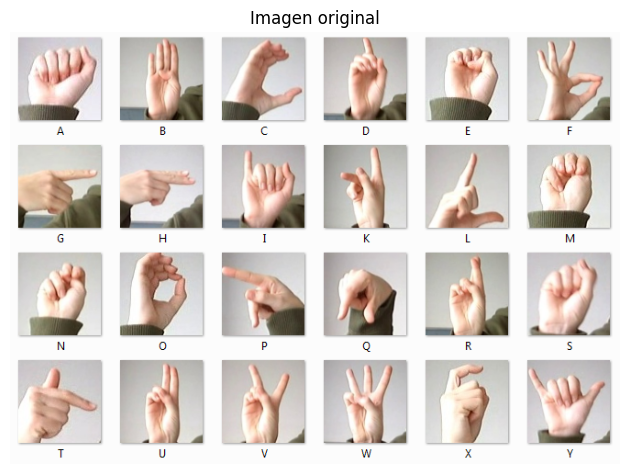

----

Processing image in: data/amer_sign3.png


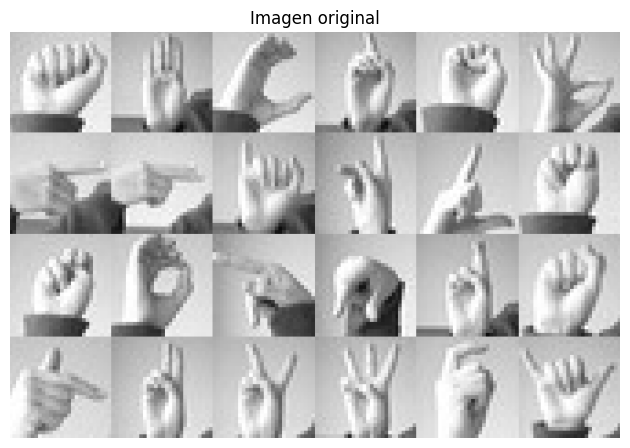

----



In [31]:
images = ['data/amer_sign2.png', 'data/amer_sign3.png']

for i in range(len(images)):
    image = images[i]
    print(f'Processing image in: {image}')
    context = Context()
    steps = [
        ("loader", ImageLoader(context)),
        ("prettyPrinter", PrettyPrinter(context))
    ]
    pipeline = Pipeline(steps)
    pipeline.fit(X=image)